In [29]:
# Importing libraries
import os
import pandas as pd
import numpy as np
# ploting 2D data
from matplotlib import pyplot
# ploting 3D data
from mpl_toolkits.mplot3d import Axes3D

In [30]:
# Loading data set with pandas and cleaning some data

df = pd.read_csv('nyc-east-river-bicycle-counts.csv')
df.drop('Unnamed: 0', inplace=True, axis = 1)

In [31]:
# Extracting our x and y from data set as series and converting them to numpy array 

x = df[['High Temp (°F)', 'Low Temp (°F)', 'Precipitation']].to_numpy()
y = df[['Brooklyn Bridge', 'Manhattan Bridge','Williamsburg Bridge', 'Queensboro Bridge']].to_numpy()
temp_x = x.copy()

In [32]:
# before we start writing cost function we have to insert one column to X matrix, be cause we are gonna use
# vectorized version of computation
#Do not run this column more than ones

m = x[:,1].size
x = np.append(np.ones(m).reshape(m,1),x, axis=1)
temp_x = np.append(np.ones(m).reshape(m, 1), temp_x, axis=1)

<h3>Cost function equation</h3>
$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left( h_{\theta}(x^{(i)}) - y^{(i)}\right)^2$$

where the hypothesis $h_\theta(x)$ is given by the linear model
$$ h_\theta(x) = \theta^Tx = \theta_0 + \theta_1 x_1$$

In [33]:
def compute_cost_function(x, y, theta):
    m = y.size
    j = 0
    h = x @ theta
    difference = (h - y) ** 2
    j = np.sum(difference) / (2 * m)
    return j
    

In [34]:
# Testing cost function if it works
compute_cost_function(x, y[:,0], np.array([0,0,0,0]))

3054739.0833333335

In [35]:
def visualise_cost_function(x,y):
    pyplot.plot(x, y, c='red')
    pyplot.xlabel('Number Of Itteration')
    pyplot.ylabel('Cost Function')
    pyplot.show()

<h3>Gradient decent</h3>

$$ \theta_j = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)}\right)x_j^{(i)} \qquad \text{simultaneously update } \theta_j \text{ for all } j$$

With each step of gradient descent, your parameters $\theta_j$ come closer to the optimal values that will achieve the lowest cost J($\theta$).

<h3 class="text text-danger">Notice here we have multiple y then we have to make model for each y and compute it's related thetas</h3>

In [36]:
# Somehow this shit doesnt work properly
# will fix this later
def gradient_decent_for_all_y(x, y, theta, alpha, num_itteration):
    m = y[:, 0].size
    temp_y = np.array(y, copy=True)
    thetas = []
    
    for i in range(len(y.T)):
        temp = []
        temp_theta = np.array(theta, copy=True)
        for n in range(num_itteration):
            h = x @ temp_theta
            difference = (h - y[:, i])
            temp_theta = temp_theta - (alpha / m) * (x.T @ difference)
            temp.append([n, compute_cost_function(x,y[:,i], temp_theta)])
        thetas.append(temp_theta)
        #visualise_cost_function(temp[0], temp[1])
    return thetas
            

In [37]:
def gradient_decent2(x,y,theta,alpha,num_iters):
    m = y.shape[0]
    tetha = theta.copy()
    info = []
    for i in range(num_iters):
        h = x @ theta
        difference = (h - y)
        theta = theta - (alpha / m) * (x.T @ difference)
        
        #then we compute cost function for each itteration to see the changes
        j = compute_cost_function(x,y, theta)
        info.append([i, j])
        
    return theta, info

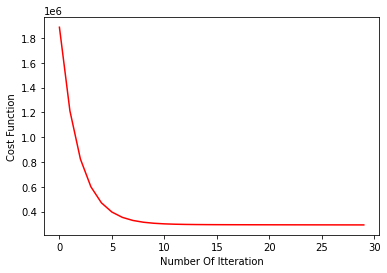

[ 0.33476842 25.20868857 16.85557142 -0.04130135]


In [38]:
# finding first y's thetas
theta0, info = gradient_decent2(x, y[:,0], np.array([0,0,0,0]) ,0.00004, 30)
info = np.array([info])
info = info.T
visualise_cost_function(info[0], info[1])
print(theta0)

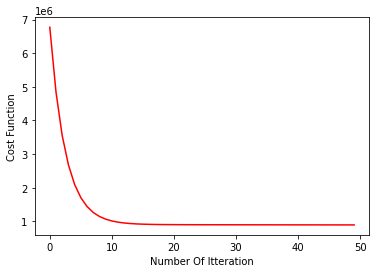

[ 0.58760221 45.15541966 29.66888552 -0.09245174]


In [39]:
# finding second y's thetas
theta1, info = gradient_decent2(x, y[:,1], np.array([0,0,0,0]) ,0.00003, 50)
info = np.array([info])
info = info.T
visualise_cost_function(info[0], info[1])
print(theta1)

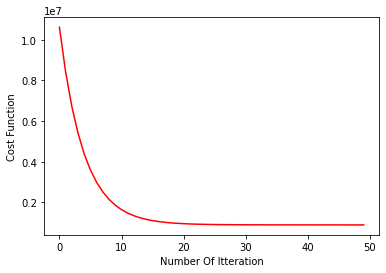

[ 7.49689651e-01  5.26555950e+01  3.73091231e+01 -4.48062027e-02]


In [40]:
# finding third y's thetas
theta2, info = gradient_decent2(x, y[:,2], np.array([0,0,0,0]) ,0.00002, 50)
info = np.array([info])
info = info.T
visualise_cost_function(info[0], info[1])
print(theta2)

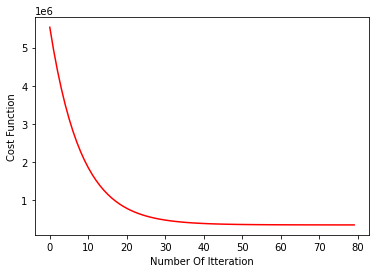

[ 5.41126229e-01  3.56404939e+01  2.56059626e+01 -1.34392242e-02]


In [41]:
# finding forth y's thetas
theta3, info = gradient_decent2(x, y[:,3], np.array([0,0,0,0]) ,0.00001, 80)
info = np.array([info])
info = info.T
visualise_cost_function(info[0], info[1])
print(theta3)

In [42]:
thetas = gradient_decent_for_all_y(x,y, np.array([0,0,0,0]), 0.000001, 300)
thetas

[array([3.08818444e-01, 2.03897295e+01, 1.50251875e+01, 2.24576054e-04]),
 array([5.52446019e-01, 3.62474268e+01, 2.68193329e+01, 1.88527095e-03]),
 array([6.64728815e-01, 4.33180161e+01, 3.23174528e+01, 7.18765910e-03]),
 array([4.62879999e-01, 2.96315885e+01, 2.20884295e+01, 7.15580355e-03])]

In [43]:
result = np.dot([1, 43, 38, 0.09], thetas[0])
result

1448.0243354683314

In [44]:
temp_x[:,1] = (temp_x[:, 1] - temp_x[:, 1].min()) / (temp_x[:, 1].max() - temp_x[:, 1].min())

In [45]:
temp_x[:,2] = (temp_x[:, 2] - temp_x[:, 2].min()) / (temp_x[:, 2].max() - temp_x[:, 2].min())

In [46]:
#temp_x[:,3] = (temp_x[:, 3] - temp_x[:, 3].mean()) / (temp_x[:, 3].max() - temp_x[:, 3].min())

In [63]:
x

array([[1.00e+00, 7.81e+01, 6.60e+01, 1.00e-02],
       [1.00e+00, 5.50e+01, 4.89e+01, 1.50e-01],
       [1.00e+00, 3.99e+01, 3.40e+01, 9.00e-02],
       [1.00e+00, 4.41e+01, 3.31e+01, 4.70e-01],
       [1.00e+00, 4.21e+01, 2.61e+01, 0.00e+00],
       [1.00e+00, 4.50e+01, 3.00e+01, 0.00e+00],
       [1.00e+00, 5.70e+01, 5.31e+01, 9.00e-02],
       [1.00e+00, 4.69e+01, 4.41e+01, 1.00e-02],
       [1.00e+00, 4.30e+01, 3.79e+01, 9.00e-02],
       [1.00e+00, 4.89e+01, 3.09e+01, 0.00e+00],
       [1.00e+00, 6.21e+01, 4.60e+01, 1.00e-02],
       [1.00e+00, 5.70e+01, 4.50e+01, 2.00e-01],
       [1.00e+00, 5.70e+01, 3.99e+01, 0.00e+00],
       [1.00e+00, 6.21e+01, 4.46e+01, 0.00e+00],
       [1.00e+00, 6.40e+01, 4.41e+01, 0.00e+00],
       [1.00e+00, 6.60e+01, 4.50e+01, 0.00e+00],
       [1.00e+00, 7.39e+01, 4.60e+01, 0.00e+00],
       [1.00e+00, 8.10e+01, 5.20e+01, 0.00e+00],
       [1.00e+00, 7.11e+01, 6.30e+01, 0.00e+00],
       [1.00e+00, 6.80e+01, 5.00e+01, 0.00e+00],
       [1.00e+00, 7.

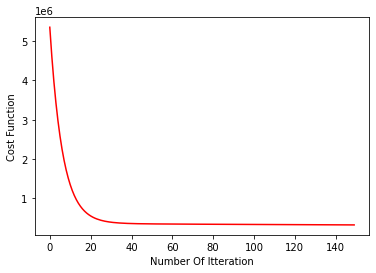

[2066.22898344 1547.98927967 1039.86149112 -262.43657522]


In [47]:
test_theta, info = gradient_decent2(temp_x, y[:,3], np.array([0,0,0,0]) , 0.05, 150)
info = np.array([info])
info = info.T
visualise_cost_function(info[0], info[1])
print(test_theta)

In [60]:
p = np.array([1,64,48,0])
p = (p - p.min()) / (p.max() - p.min())
p[0] = 1
p

array([1.  , 1.  , 0.75, 0.  ])

In [62]:
result = np.dot(np.array([1,64,48,0]), test_theta)
print(test_theta)

[2066.22898344 1547.98927967 1039.86149112 -262.43657522]


In [50]:
def draw_graph(x,y):
    fig = pyplot.figure()
    pyplot.scatter(x,y,c='red')
    pyplot.show()

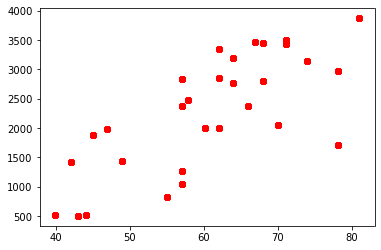

In [51]:
draw_graph(x[:,1], y[:, 0])

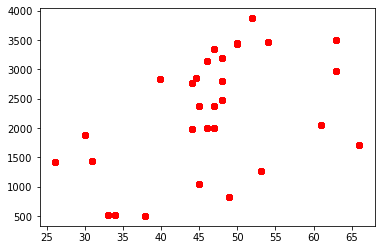

In [52]:
draw_graph(x[:,2], y[:, 0])

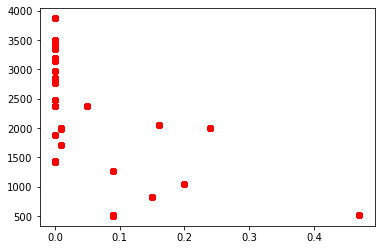

In [53]:
draw_graph(x[:,3], y[:, 0])

In [54]:
def gradient_decent3(x,y,theta,alpha,num_iters):
    m = y.shape[0]
    tetha = theta.copy()
    info = []
    for i in range(num_iters):
        h = x @ theta
        difference = (h - y)
        theta = theta - (alpha / m) * (x.T @ difference)
        
        #then we compute cost function for each itteration to see the changes
        j = compute_normilized_cost_function(x,y, theta)
        info.append([i, j])
        
    return theta, info

In [55]:
temp_x[:, 3] = temp_x[:, 3] * 100

In [56]:
test_one, info = gradient_decent3(temp_x, y[:,0], np.array([0,0,0,10]) ,0.01, 50)
info = np.array([info])
info = info.T
visualise_cost_function(info[0], info[1])
print(theta0)

NameError: name 'compute_normilized_cost_function' is not defined